## 分类变量
#### One-Hot编码（虚拟变量）

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
data = pd.read_csv('/Users/yangsan/data/adult.data', header=None, index_col=False, 
                   names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
                          'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
                          'hours-per-week', 'native-country', 'income'])
# 读取其中几列
data = data[['age', 'workclass', 'education', 'sex', 'hours-per-week', 'occupation', 'income']]
data.head()

,age,workclass,education,sex,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [16]:
print(data.sex.value_counts())

 Male      21790
 Female    10771
Name: sex, dtype: int64


In [17]:
print('Original feature: \n', list(data.columns), '\n')
data_dummies = pd.get_dummies(data)
print('Features after get_dummies: \n', list(data_dummies.columns))

Original feature: 
 ['age', 'workclass', 'education', 'sex', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies: 
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'sex_ Female', 'sex_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 

In [18]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [19]:
feature = data_dummies.ix[:, 'age':'occupation_ Transport-moving']
# 提取Numpy数组
X = feature.values
y = data_dummies['income_ >50K'].values
print('X.shape: {} y.shape: {}'.format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


/anaconda3/envs/ys/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Test score: {:.2f}'.format(logreg.score(X_test, y_test)))

Test score: 0.81


/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
# 创建一个DataFrame， 包含一个整数特征和一个分类字符串特征
demo_df = pd.DataFrame({'Integer Feature': [0,1,2,1], 
                        'Categorical FFeature': ['socks', 'fox', 'socks', 'box']})
demo_df

,Integer Feature,Categorical FFeature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [22]:
pd.get_dummies(demo_df)

,Integer Feature,Categorical FFeature_box,Categorical FFeature_fox,Categorical FFeature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [24]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical FFeature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical FFeature_box,Categorical FFeature_fox,Categorical FFeature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


### 分箱、离散化、线性模型与树

### 交互特征与多项式特征

### 单变量非线性变换

In [25]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [26]:
print('Number of feature appearances: \n{}'.format(np.bincount(X[:, 0])))

Number of feature appearances: 
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Value')

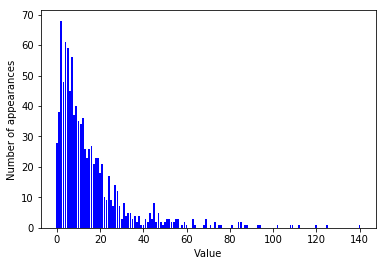

In [30]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='b')
plt.ylabel('Number of appearances')
plt.xlabel('Value')

In [28]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print('Test score: {:.3f}'.format(score))

Test score: 0.622


In [31]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'Value')

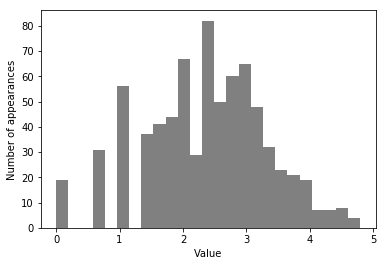

In [32]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel('Number of appearances')
plt.xlabel('Value')

In [33]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print('Test score: {:.3f}'.format(score))

Test score: 0.875


### 自动化特征选择

#### 单变量统计

In [35]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

# 获得确定性的随机数
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# 向数据中添加噪声特征
# 前30个特征来自数据集，后50个是噪声
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, 
                                                    random_state=0, test_size=.5)
# 使用f_classif（默认值）和Selectpercentile来选择50%的特征
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# 对训练集进行变换
X_train_selected = select.transform(X_train)

print('X_train.shape: {}'.format(X_train.shape))
print('X_train_selected.shape: {}'.format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Sample index')

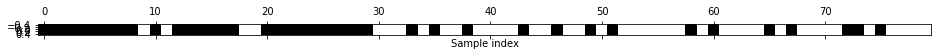

In [36]:
mask = select.get_support()
print(mask)
# 将遮罩可视化----黑色为True, 白色为False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('Sample index')

In [39]:
from sklearn.linear_model import LogisticRegression

# 对测试数据进行变换
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Score with all feature: {:.3f}'.format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print('Score with only selected feature: {:.3f}'.format(lr.score(X_test_selected, y_test)))

Score with all feature: 0.930
Score with only selected feature: 0.940


/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### 基于模型的特征选择

In [40]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')

In [41]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print('X_train.shape: {}'.format(X_train.shape))
print('X_train_l1.shape: {}'.format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5, 0, 'Sample index')

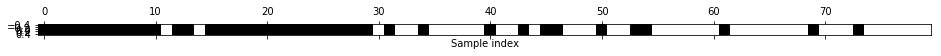

In [42]:
mask = select.get_support()
# 将遮罩可是化---黑色为True,白色为False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('Sample index')

In [43]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print('Test score: {:.3f}'.format(score))

Test score: 0.951


/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### 迭代特征选择

Text(0.5, 0, 'Sample index')

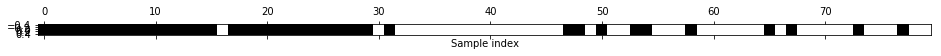

In [45]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), 
             n_features_to_select=40)
select.fit(X_train, y_train)
# 将选中的特征可是化
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('Sample index')

In [46]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print('Test score: {:.3f}'.format(score))

Test score: 0.951


/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [47]:
print('Test score: {:.3f}'.format(select.score(X_test, y_test)))

Test score: 0.951


### 利用专家知识

In [192]:
citibike = pd.read_csv('/users/yangsan/data/citibike-tripdata.csv')
citibike

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,107,2019-04-01 07:48:04.7540,2019-04-01 07:49:52.3590,3183,Exchange Place,40.716247,-74.033459,3184,Paulus Hook,40.714145,-74.033552,29536,Subscriber,1966,1
1,493,2019-04-01 12:41:09.6540,2019-04-01 12:49:23.0290,3183,Exchange Place,40.716247,-74.033459,3187,Warren St,40.721124,-74.038051,26191,Customer,1990,1
2,512,2019-04-01 14:27:07.9400,2019-04-01 14:35:40.9370,3183,Exchange Place,40.716247,-74.033459,3202,Newport PATH,40.727224,-74.033759,29302,Subscriber,1987,2
3,196,2019-04-01 15:07:38.1510,2019-04-01 15:10:54.6260,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,26220,Subscriber,1989,1
4,463,2019-04-01 16:19:24.6940,2019-04-01 16:27:08.6450,3183,Exchange Place,40.716247,-74.033459,3273,Manila & 1st,40.721651,-74.042884,26228,Subscriber,1995,1
5,197,2019-04-01 16:48:52.6740,2019-04-01 16:52:10.1410,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,26157,Subscriber,1960,1
6,242,2019-04-01 16:50:45.7350,2019-04-01 16:54:48.2610,3183,Exchange Place,40.716247,-74.033459,3267,Morris Canal,40.712419,-74.038526,29640,Subscriber,1968,1
7,361,2019-04-01 17:17:45.1170,2019-04-01 17:23:46.7160,3183,Exchange Place,40.716247,-74.033459,3273,Manila & 1st,40.721651,-74.042884,26254,Subscriber,1980,1
8,78,2019-04-01 17:20:12.6650,2019-04-01 17:21:30.7450,3183,Exchange Place,40.716247,-74.033459,3184,Paulus Hook,40.714145,-74.033552,29629,Subscriber,1985,1
9,101,2019-04-01 17:20:37.7220,2019-04-01 17:22:19.5460,3183,Exchange Place,40.716247,-74.033459,3639,Harborside,40.719252,-74.034234,29641,Subscriber,1969,0


In [257]:
citibike['one'] = 1
citibike['starttime'] = pd.to_datetime(citibike.starttime)
time = citibike.set_index('starttime')
data = time.resample('3h').sum().fillna(0)
data = data.one
data

starttime
2019-04-01 00:00:00      6
2019-04-01 03:00:00     15
2019-04-01 06:00:00    238
2019-04-01 09:00:00     97
2019-04-01 12:00:00     78
2019-04-01 15:00:00    195
2019-04-01 18:00:00    262
2019-04-01 21:00:00     55
2019-04-02 00:00:00      9
2019-04-02 03:00:00     15
2019-04-02 06:00:00    346
2019-04-02 09:00:00    135
2019-04-02 12:00:00     92
2019-04-02 15:00:00    188
2019-04-02 18:00:00    287
2019-04-02 21:00:00     46
2019-04-03 00:00:00      5
2019-04-03 03:00:00     19
2019-04-03 06:00:00    312
2019-04-03 09:00:00    142
2019-04-03 12:00:00    121
2019-04-03 15:00:00    216
2019-04-03 18:00:00    336
2019-04-03 21:00:00     65
2019-04-04 00:00:00      6
2019-04-04 03:00:00     10
2019-04-04 06:00:00    336
2019-04-04 09:00:00    116
2019-04-04 12:00:00    106
2019-04-04 15:00:00    213
                      ... 
2019-04-27 06:00:00     65
2019-04-27 09:00:00    197
2019-04-27 12:00:00    247
2019-04-27 15:00:00    189
2019-04-27 18:00:00    174
2019-04-27 21:00:0

Text(0, 0.5, 'Rentals')

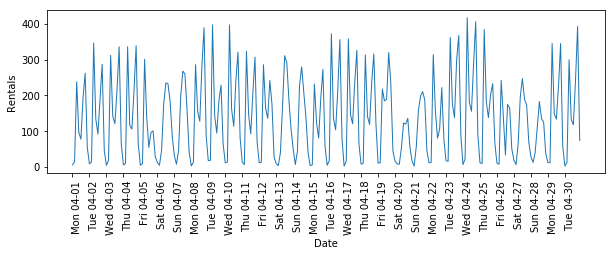

In [258]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=data.index.min(), end=data.index.max(), freq='D')
plt.xticks(xticks, xticks.strftime('%a %m-%d'), rotation=90, ha='left')
plt.plot(data, linewidth=1)
plt.xlabel('Date')
plt.ylabel('Rentals')

In [259]:
# 提取目标值（租车数量）
y = data.values
# 利用‘%s’将时间转换为POSIX时间
X = pd.to_datetime(data.index).strftime('%s').astype('int')
X = np.array(X).reshape(-1, 1)

In [268]:
# 使用前184个数据点用于训练集，剩余的数据点用于测试
n_train = 184

# 对给定特征集上的回归进行评估和作图的函数
def eval_on_features(features, target, regressor):
    # 将给定特征划分为训练集和测试集
    X_train, X_test = features[:n_train], features[n_train:]
    # 同样划分目标数据
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print('Test-set R^2: {:.2f}'.format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))
    
    plt.xticks(range(0, len(X), 8), xticks.strftime('%a %m-%d'), rotation=90, ha='left')
    plt.plot(range(n_train), y_train, label='train')
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label='test')
    plt.plot(range(n_train), y_pred_train, '--', label='prediction train')
    
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label='prediction test')
    plt.legend(loc=(1.01, 0))
    plt.xlabel('Date')
    plt.ylabel('Rentals')

Test-set R^2: -0.05


<Figure size 432x288 with 0 Axes>

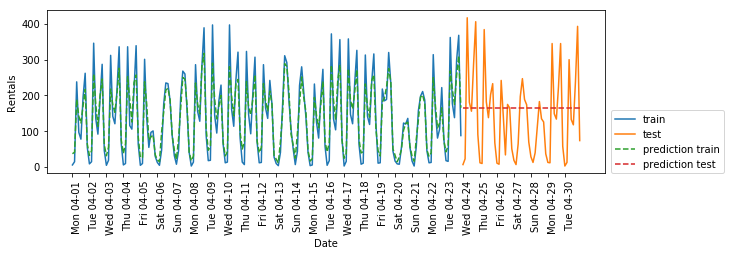

In [269]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
plt.figure()
eval_on_features(X, y, regressor)

Test-set R^2: 0.65


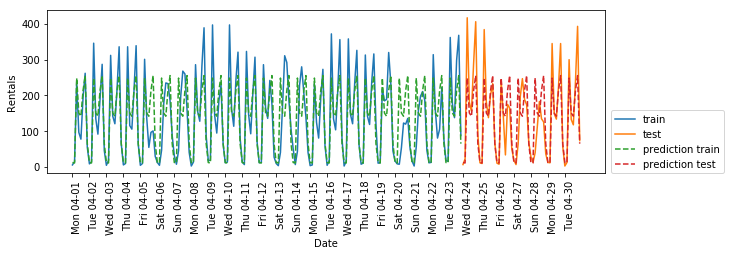

In [270]:
X_hour = np.array(pd.to_datetime(data.index).hour).reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

Test-set R^2: 0.88


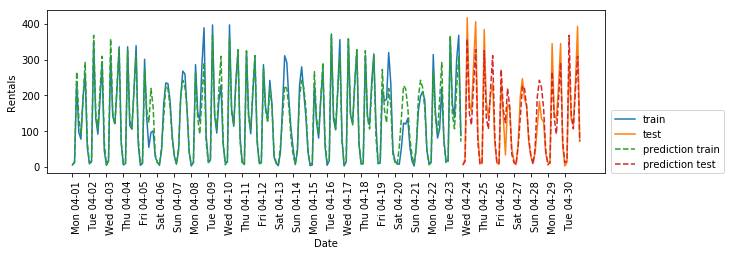

In [271]:
X_hour_week = np.hstack([np.array(pd.to_datetime(data.index).dayofweek).reshape(-1, 1), 
                         np.array(pd.to_datetime(data.index).hour).reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

Test-set R^2: 0.15


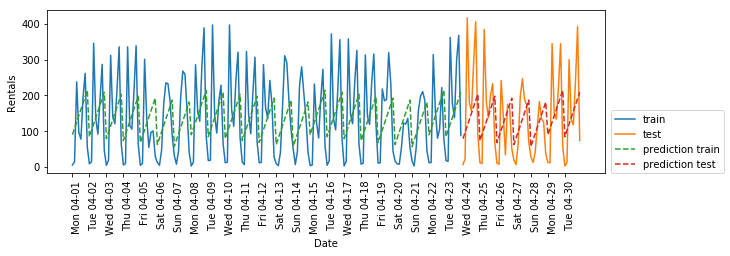

In [272]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

In [273]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X_hour_week_one = enc.fit_transform(X_hour_week).toarray()

/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Test-set R^2: 0.70


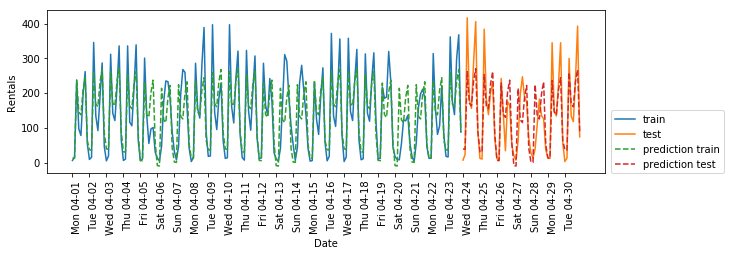

In [274]:
from sklearn.linear_model import Ridge
eval_on_features(X_hour_week_one, y, Ridge())

Test-set R^2: 0.87


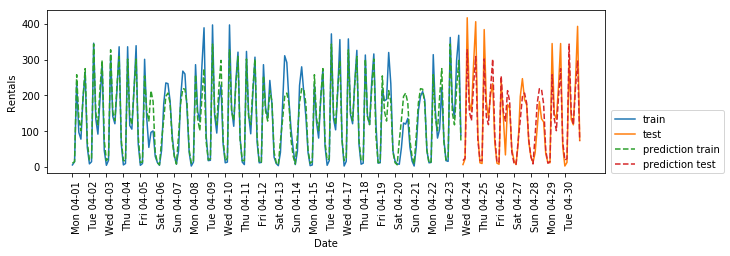

In [275]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_hour_week_one_poly = poly_transformer.fit_transform(X_hour_week_one)
lr = Ridge()
eval_on_features(X_hour_week_one_poly, y, lr)

In [276]:
hour = ['%02d:00' % i for i in range(0, 24, 3)]
day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
feature = day + hour
feature

['Mon',
 'Tue',
 'Wed',
 'Thu',
 'Fri',
 'Sat',
 'Sun',
 '00:00',
 '03:00',
 '06:00',
 '09:00',
 '12:00',
 '15:00',
 '18:00',
 '21:00']

In [277]:
features_poly = poly_transformer.get_feature_names(feature)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Text(0, 0.5, 'Feature magnitude')

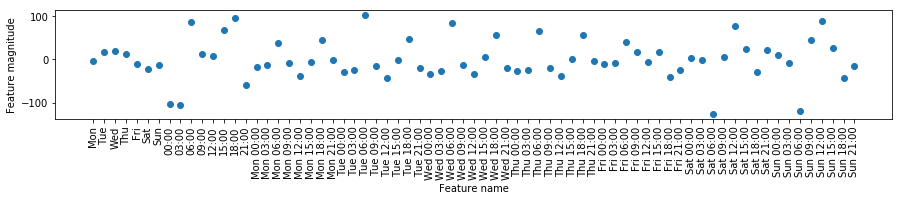

In [278]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel('Feature name')
plt.ylabel('Feature magnitude')